In [2]:
#importing all necessary libraries: 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np


In [2]:
data = pd.read_csv('Madrid Daily Weather 1997-2015.csv')
#print (data)

#convert CET column to datetime format:
data['CET'] = pd.to_datetime(data['CET'])

#set CET column as the index - time-based operations, readability and functionality:
data.set_index('CET', inplace=True)

In [4]:
data

,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,Max Sea Level PressurehPa,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
CET,,,,,,,,,,,,,,,,,,,,,
1997-01-01,7.0,4.0,2.0,5.0,3.0,2.0,100.0,95.0,76.0,1010,...,10.0,9.0,4.0,13,6,NaN,0.00,6.0,NaN,229
1997-01-02,7.0,3.0,0.0,6.0,3.0,0.0,100.0,92.0,71.0,1007,...,10.0,9.0,4.0,26,8,47.0,0.00,5.0,Rain,143
1997-01-03,5.0,3.0,2.0,5.0,1.0,-1.0,100.0,85.0,70.0,1005,...,10.0,10.0,7.0,27,19,NaN,0.00,6.0,Rain-Snow,256
1997-01-04,7.0,3.0,-1.0,-2.0,-3.0,-4.0,86.0,63.0,49.0,1012,...,10.0,10.0,10.0,27,19,40.0,0.00,2.0,NaN,284
1997-01-05,2.0,0.0,-1.0,2.0,0.0,-3.0,100.0,95.0,86.0,1012,...,10.0,5.0,1.0,14,6,NaN,0.00,7.0,Snow,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,14.0,7.0,-1.0,6.0,2.0,-2.0,100.0,77.0,30.0,1035,...,31.0,14.0,5.0,14,6,NaN,0.00,8.0,Fog,38
2015-12-28,15.0,8.0,2.0,8.0,4.0,1.0,100.0,78.0,34.0,1031,...,31.0,14.0,8.0,27,8,45.0,0.51,7.0,Rain,243
2015-12-29,11.0,8.0,5.0,9.0,7.0,5.0,100.0,89.0,66.0,1034,...,31.0,9.0,0.0,14,8,32.0,2.03,5.0,Fog-Rain,190


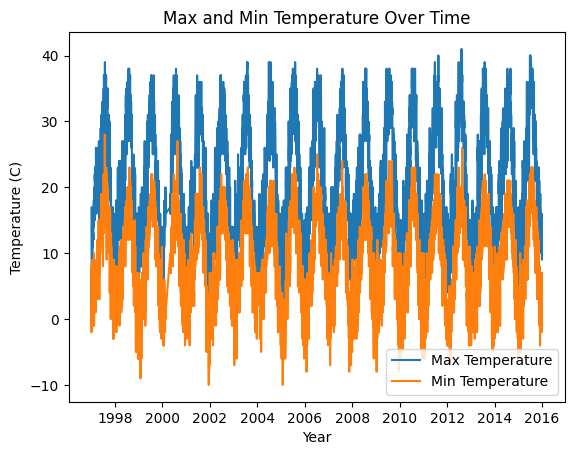

In [3]:
#temprature over time
plt.figure
sns.lineplot(x=data.index, y=data['Max TemperatureC'], label='Max Temperature')
sns.lineplot(x=data.index, y=data['Min TemperatureC'], label='Min Temperature')
plt.title('Max and Min Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()

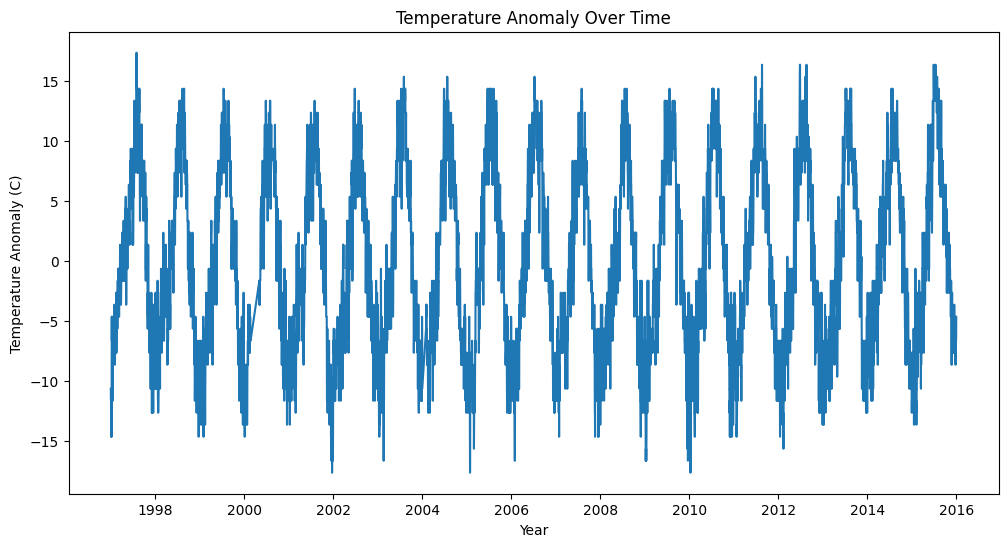

In [5]:
#anomaly plot to show trends:
plt.figure(figsize=(12, 6))
mean_temp_reference = data['Mean TemperatureC'].mean()
temperature_anomaly = data['Mean TemperatureC'] - mean_temp_reference
sns.lineplot(x=data.index, y=temperature_anomaly)
plt.title('Temperature Anomaly Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (C)')
plt.show()

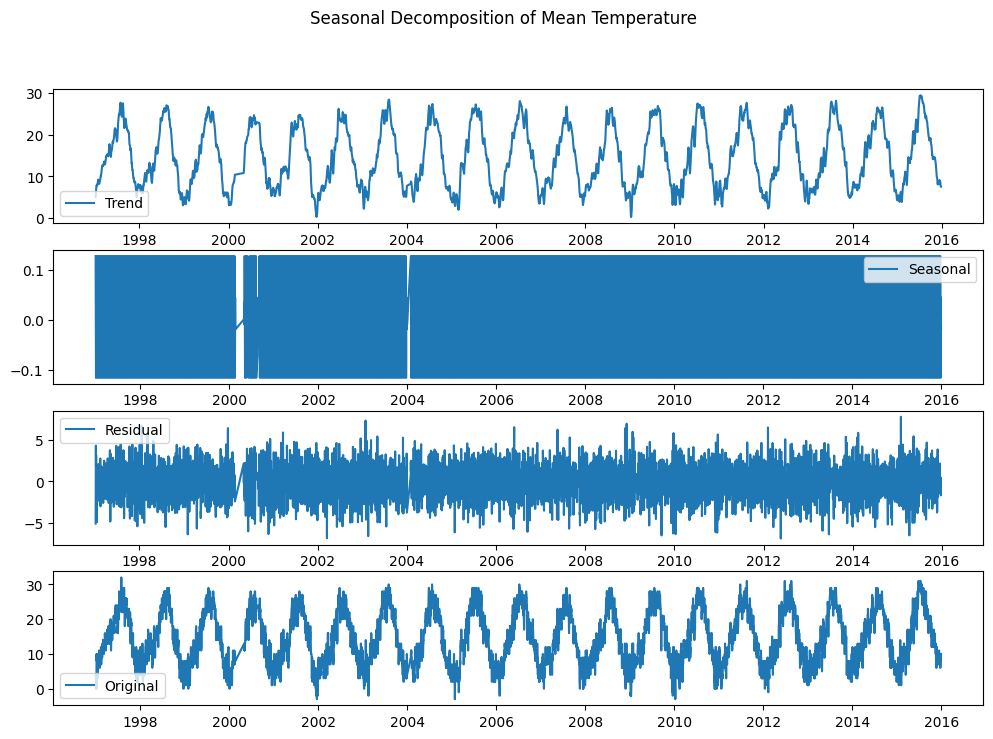

In [6]:
#seasonal decomposition:
from statsmodels.tsa.seasonal import seasonal_decompose
data['Mean TemperatureC'] = data['Mean TemperatureC'].interpolate()

decomposition = seasonal_decompose(data['Mean TemperatureC'], period=12)

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(data.index, decomposition.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(data.index, decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(data.index, decomposition.resid, label='Residual')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(data.index, data['Mean TemperatureC'], label='Original')
plt.legend()

plt.suptitle('Seasonal Decomposition of Mean Temperature')
plt.show()

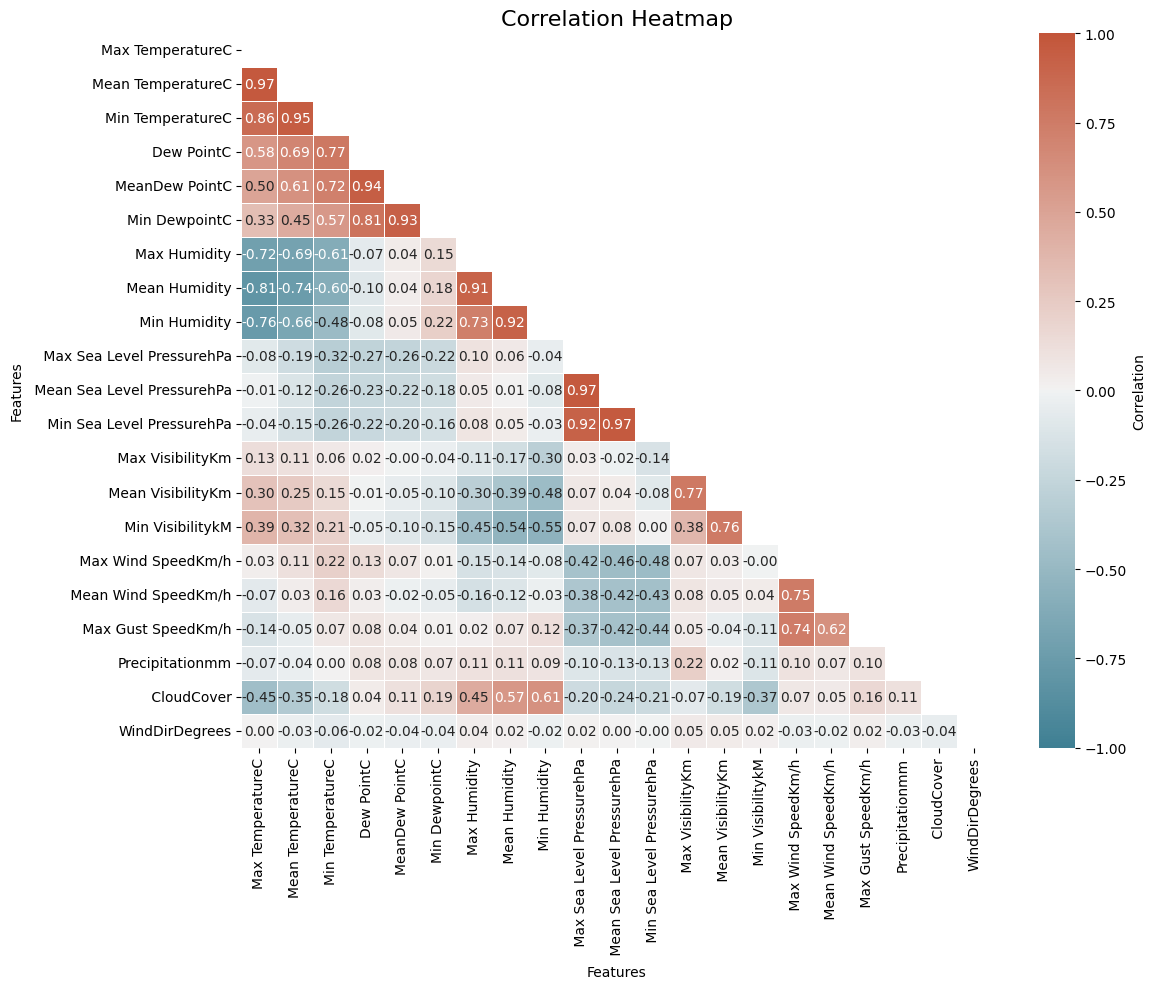

In [7]:
#heatmap for correlation:
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, mask=mask, vmin=-1, vmax=1, linewidths=.5, fmt=".2f", cbar_kws={'label': 'Correlation'})
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

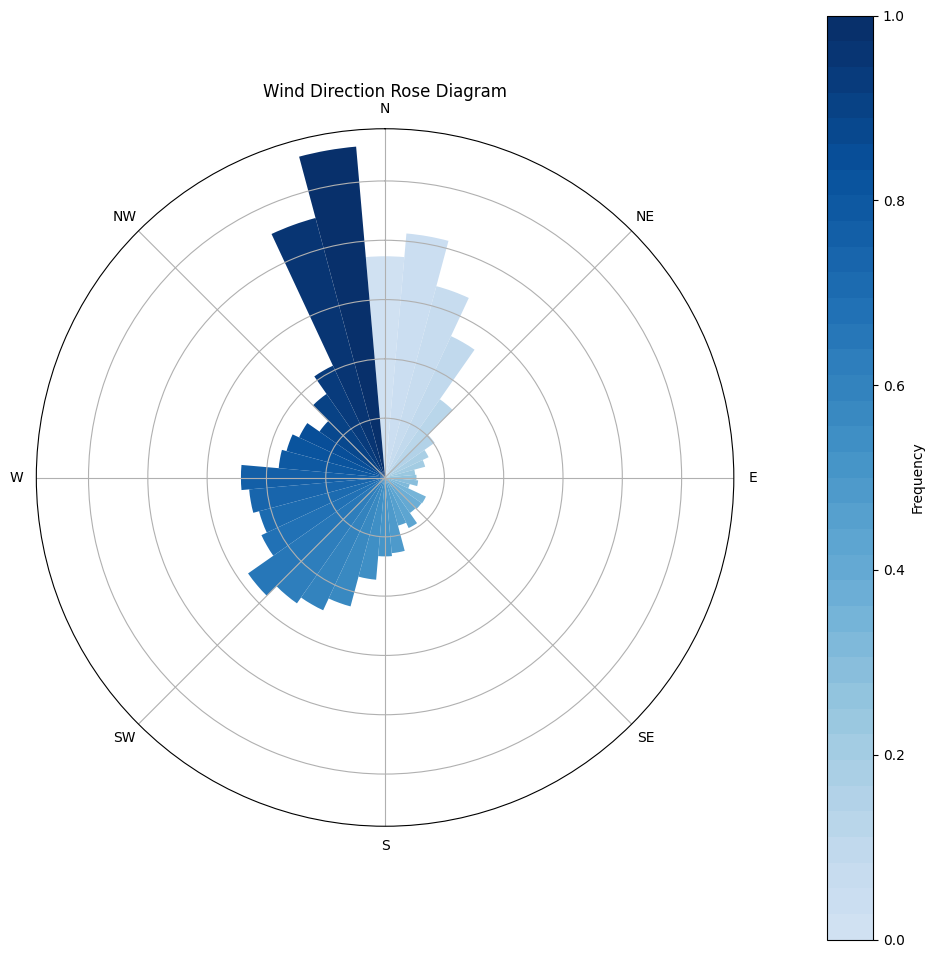

In [8]:
#wind direction rose diagram:
wind_data = data.dropna(subset=['WindDirDegrees'])

plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

theta = np.radians(wind_data['WindDirDegrees'])

cmap = ListedColormap(plt.cm.Blues(np.linspace(0.2, 1, 36)))

bars = ax.bar(np.arange(0, 2*np.pi, np.pi/18), np.histogram(theta, bins=36)[0], width=np.pi/18, color=[cmap(i) for i in range(36)])

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, pad=0.1)
cbar.set_label('Frequency')

ax.set_theta_direction(-1) #clockwise ?
ax.set_theta_offset(np.pi / 2.0)
ax.set_rlabel_position(90)
ax.set_yticklabels([])
ax.set_title('Wind Direction Rose Diagram', va='bottom', pad=20)

directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(directions)

plt.show()